# Step1: Problem Definition

The key challenge is to predict if an individual customer will churn or not.To accomplish that, machine learning models are trained based on 80% of the sample data. The remaining 20% are used to apply the trained models and assess their predictive power with regards to “churn / not churn”.

To compare models and select the best for this task, the accuracy is measured. Based on other characteristics of the data, for example the balance between classes (number of “churners” vs. “non-churners” in data set) further metrics are considered if needed.

# Step2: Data Collection

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

data = pd.read_csv('C:/Users/chandu/Desktop/Imarticus/WA_Fn-UseC_-Telco-Customer-Churn (1).csv')

# Step3: Exploratory Data Analysis

After data collection, several steps are carried out to explore the data. Goal of this step is to get an understanding of the data structure, conduct initial preprocessing, clean the data, identify patterns and inconsistencies in the data and build and validate hypotheses.

In [2]:
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
# Looping through the columns to get unique values for each column
for i in data.columns:
    print(f"Unique {i}'s count: {data[i].nunique()}")
    print(f"{data[i].unique()}\n")

Unique customerID's count: 7043
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

Unique gender's count: 2
['Female' 'Male']

Unique SeniorCitizen's count: 2
[0 1]

Unique Partner's count: 2
['Yes' 'No']

Unique Dependents's count: 2
['No' 'Yes']

Unique tenure's count: 73
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

Unique PhoneService's count: 2
['No' 'Yes']

Unique MultipleLines's count: 3
['No phone service' 'No' 'Yes']

Unique InternetService's count: 3
['DSL' 'Fiber optic' 'No']

Unique OnlineSecurity's count: 3
['No' 'Yes' 'No internet service']

Unique OnlineBackup's count: 3
['Yes' 'No' 'No internet service']

Unique DeviceProtection's count: 3
['No' 'Yes' 'No internet service']

Unique TechSupport's count: 3
['No' 'Yes' 'No internet service']

Unique StreamingTV's

## Data Processing for EDA

In [7]:
# Changing the data type of "TotalCharges" and "tenure" 
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

def feature_to_float(feature_list, data):
    for i in feature_list:
        data[i] = data[i].astype(float)
    return data

feature_to_float(['tenure'], data)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24.0,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11.0,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4.0,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [8]:
# Renaming the data values of "paymentMethod" for better readability
payment_column = {'Electronic check': 'E-Check' ,'Mailed check': 'Mailed Check','Bank transfer (automatic)': 'Bank Transfer', 'Credit card (automatic)':'Credit Card'}
data["PaymentMethod"].replace(payment_column, inplace=True)

In [9]:
# Checking the data types
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [10]:
# Counting the number of missing values
data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

From the above analysis it is shown that,there are 11 missing values for “TotalCharges”. The respective data entries (=rows) will be deleted for simplicity.

## Data Exploration

In [11]:
# Apply Fivethirtyeight style to all plots
plt.style.use("fivethirtyeight")

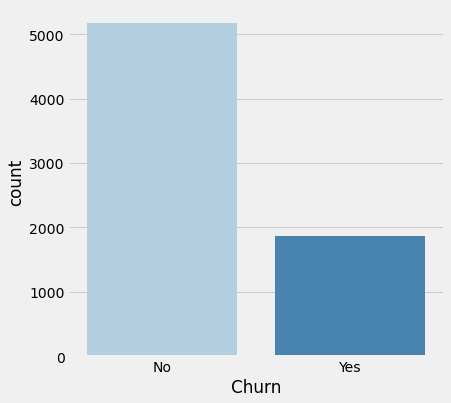

In [12]:
# Frequency distribution for churn
plt.figure(figsize=(6,6))
ax = sns.countplot(x=data['Churn'], palette="Blues", linewidth=1)
plt.show()

In [13]:
# Function to generate boxplots
plots = {1 : [111], 2 : [121, 122], 3: [131, 132, 133], 4: [221, 222, 223, 224], 
         5: [231, 232, 233, 234, 235], 6: [231, 232, 233, 234, 235, 236]}

def boxplot(x, y, data):
    
    rows = int(str(plots[len(y)][0])[0])
    columns = int(str(plots[len(y)][0])[1])
    plt.figure(figsize=(7*columns, 7*rows))
    
    for i, j in enumerate(y):
        plt.subplot(plots[len(y)][i])
        ax = sns.boxplot(x=x, y=j, data=data[[x, j]], palette="Blues", linewidth=1)
        ax.set_title(j)
        
        
    return plt.show()

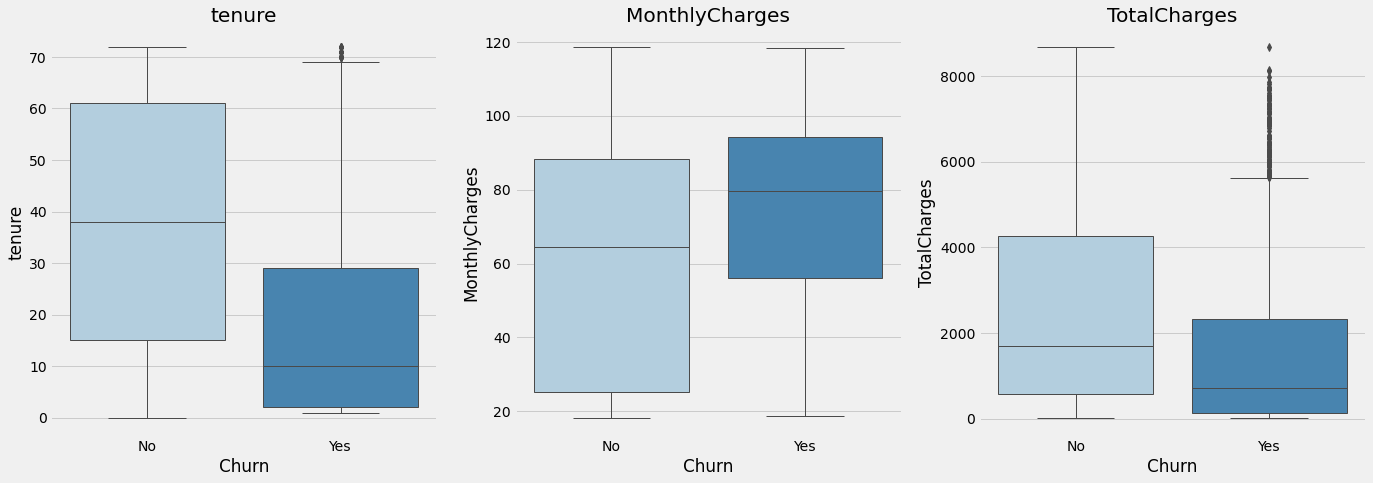

In [14]:
# Generating the boxplots for tenure, MonthlyCharges and TotalCharges
boxplot("Churn", ["tenure", "MonthlyCharges", "TotalCharges"], data)

From the above plots,

- Churning customers have much lower tenure with a median of ca. 10 months compared to a median of non-churners of ca. 38 months.

- Churning customers have higher monthly charges with a median of ca. 80 USD and much lower interquartile range compared to that of non-churners (median of ca. 65 USD).

- TotalCharges are the result of tenure and MonthlyCharges, which are more insightful on an individual basis.

In [15]:
# Creating a function to generate countpots

def countplot(x, y, data):
    
    rows = int(str(plots[len(y)][0])[0])
    columns = int(str(plots[len(y)][0])[1])
    plt.figure(figsize=(7*columns, 7*rows))
    
    for i, j in enumerate(y):
        plt.subplot(plots[len(y)][i])
        ax = sns.countplot(x=j, hue=x, data=data, palette="Blues", alpha=0.8, linewidth=0.4, edgecolor='black')
        
        ax.set_title(j)
        
        
    return plt.show()

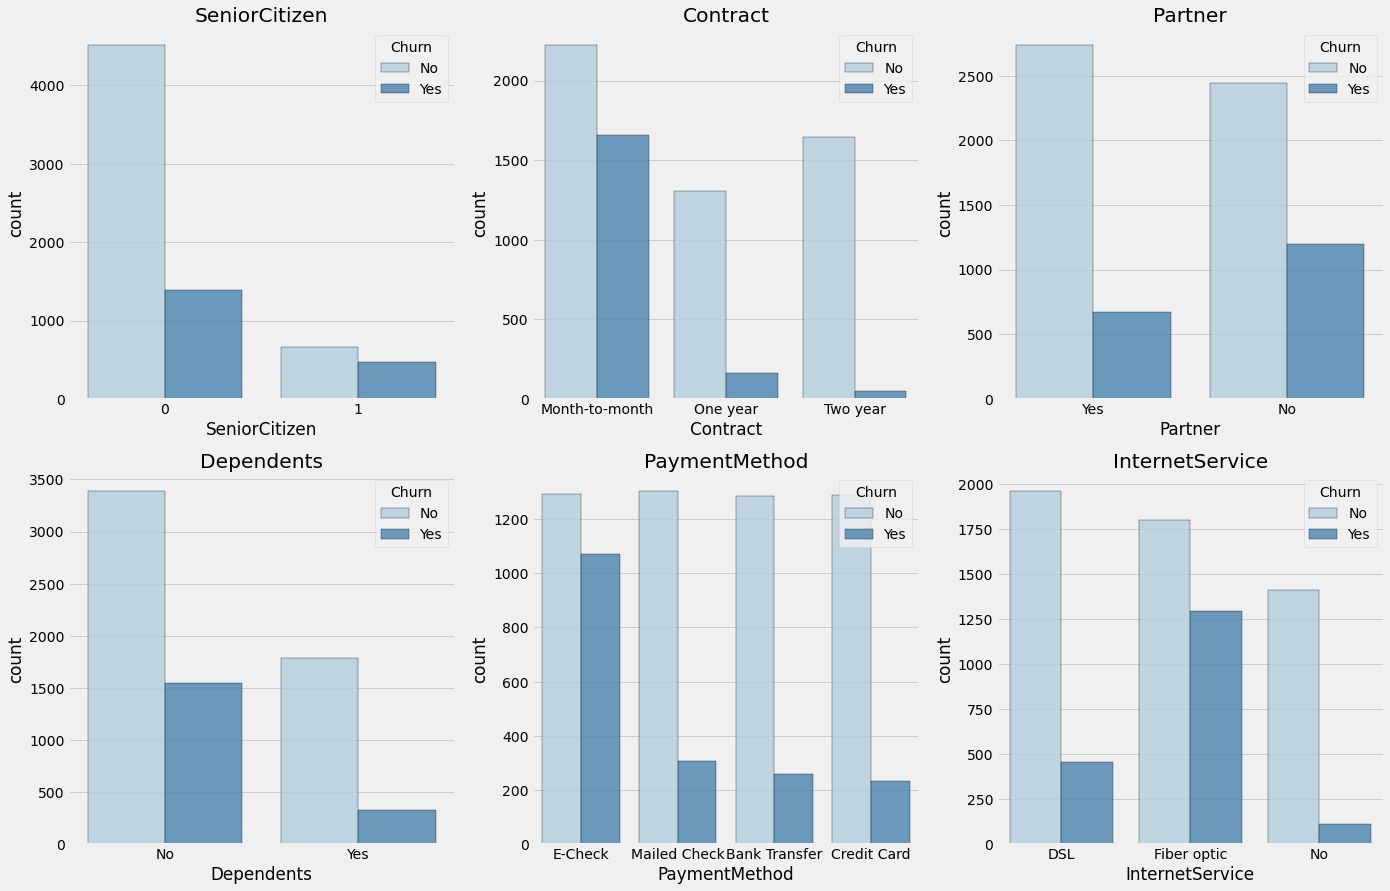

In [16]:
# Generating the count plots for various features
countplot("Churn", ['SeniorCitizen', 'Contract', 'Partner', 'Dependents', 'PaymentMethod', 'InternetService'], data)

From the above plots,

- Senior citizens churn rate is much higher than non-senior churn rate.

- Churn rate for month-to-month contracts much higher that for other contract durations.

- Moderately higher churn rate for customers without partners.

- Much higher churn rate for customers without children.

- Payment method electronic check shows much higher churn rate than other payment methods.

- Customers with InternetService fiber optic as part of their contract have much higher churn rate.

## Checking for outliers in numerical features

In [17]:
numerical_features = ["tenure", "MonthlyCharges", "TotalCharges"]
data_num = data[numerical_features]
data_num.describe()

Q1 = data_num.quantile(0.25)
Q3 = data_num.quantile(0.75)
IQR = Q3 - Q1
((data_num < (Q1 - 1.5 * IQR)) | (data_num > (Q3 + 1.5 * IQR))).any()

tenure            False
MonthlyCharges    False
TotalCharges      False
dtype: bool

No outliers in numerical features detected with the IQR method. So no adjustmentshave to be made.

## Data Cleaning

In [18]:
# Dropping the rows with missing values
data = data.dropna()

# Step4: Feature Engineering

In [19]:
# Drop customerID feature 
data = data.drop(columns='customerID')

In [20]:
# Creating new feature NumberAdditionalServices
data['Number_AdditionalServices'] = (data[['OnlineSecurity', 'DeviceProtection', 'StreamingMovies',
                                           'TechSupport', 'StreamingTV', 'OnlineBackup']] == 'Yes').sum(axis=1)

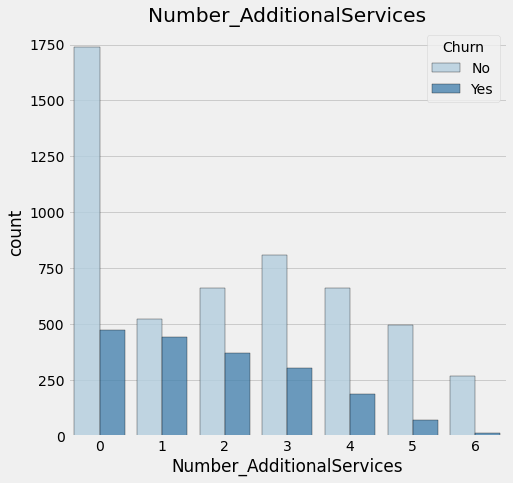

In [21]:
# Generating countplot for NumberAdditionalServices
countplot('Churn', ['Number_AdditionalServices'], data)

From the above plot,

- The countplot shows a very high churn rate for customers that have 1 additional service.

- Customers with a very high number of additional services do have a low churn rate.

## Label Encoding

In [22]:
features_le = ['gender', 'Partner', 'Departments', 'Churn', 'PhoneService', 'PaperlessBilling']

def label_encoding(features, data):
    for i in features:
        data[i] = data[i].map({'Yes': 1, 'No': 0})
    return

label_encoding(['Partner', 'Dependents', 'Churn', 'PhoneService', 'PaperlessBilling'], data)

data['gender'] = data['gender'].map({'Female': 1, 'Male': 0})

## One-Hot-Encoding

In [23]:
features_ohe = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
               'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod', 'Number_AdditionalServices']

data = pd.get_dummies(data, columns=features_ohe)

## Feature Rescaling

In [24]:
# Min-Max-Scaling for identified columns
from sklearn.preprocessing import MinMaxScaler

features_mms = ['tenure', 'MonthlyCharges', 'TotalCharges']
data_features_mms = pd.DataFrame(data, columns=features_mms)
data_remaining_features = data.drop(columns=features_mms)

mms = MinMaxScaler()
rescaled_features = mms.fit_transform(data_features_mms)

data_rescaled_features = pd.DataFrame(rescaled_features, columns=features_mms, index=data_remaining_features.index)

data = pd.concat([data_remaining_features, data_rescaled_features], axis=1)

## Correlation Analysis

<AxesSubplot:>

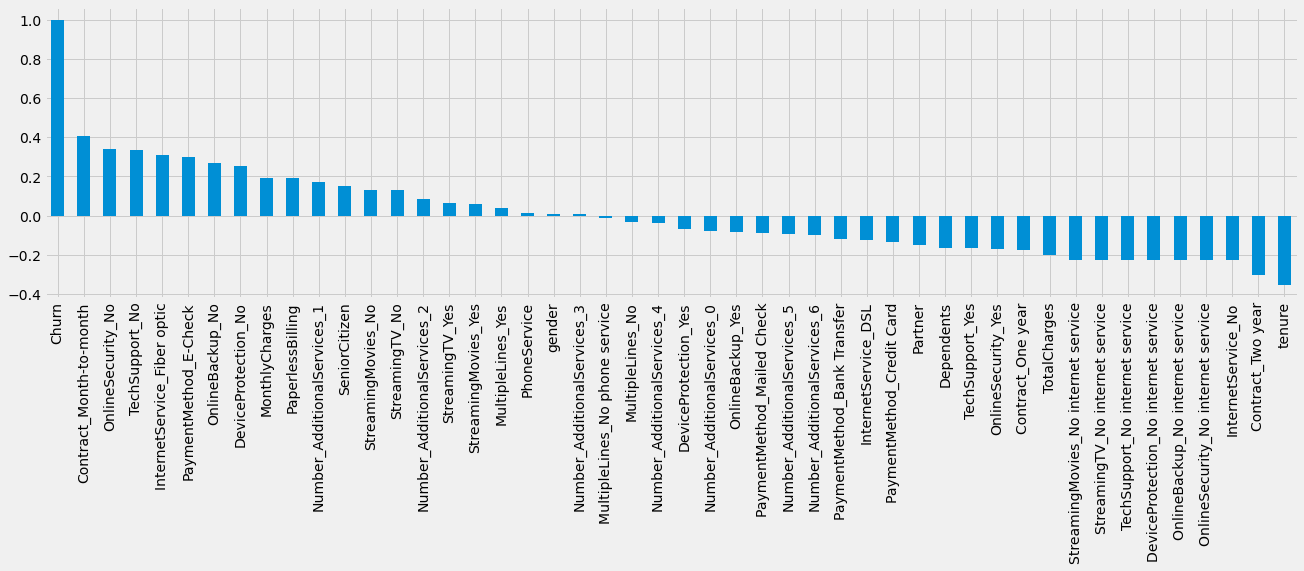

In [25]:
# Showing the correlation plot for correlation of churn with each of the remaining features
plt.figure(figsize=(16,10))
data.corr()['Churn'].sort_values(ascending=False).plot(kind='bar', figsize=(20,5))

# Step5: Train-Test Split

For the performance of model training and testing steps, the data set is split into 80% training data and 20% test data. The “Churn” column is defined as the class (the “y”), the remaining columns as the features (the “X”).

In [26]:
from sklearn.model_selection import train_test_split

x1 = data.drop('Churn', axis=1)
x = x1.values
y = data['Churn'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Step6: Model Evaluation Metrics

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import precision_recall_curve,f1_score, auc, plot_confusion_matrix, precision_score, recall_score

In [28]:
def feature_weights(x_data, classifier, classifier_name):
    weights = pd.Series(classifier.coef_[0], index=x_data.columns.values).sort_values(ascending=False)
    
    top_weights_selected = weights[:10]
    plt.figure(figsize=(6,6))
    plt.tick_params(labelsize=10)
    plt.title(f'{classifier_name} - Top 10 Features')
    top_weights_selected.plot(kind="bar")
    
    bottom_weights_selected = weights[-10:]
    plt.figure(figsize=(6,6))
    plt.tick_params(labelsize=10)
    plt.title(f'{classifier_name} - Bottom 10 Features')
    bottom_weights_selected.plot(kind="bar")
    
    return print("")

In [29]:
def confusion_matrix_plot(x_train, y_train, x_test, y_test, classifier, y_pred,
                       classifier_name):
    fig, ax = plt.subplots(figsize=(7, 6))
    plot_confusion_matrix(classifier, x_test, y_test, display_labels=["No Churn", "Churn"],
                         cmap=plt.cm.Blues, normalize=None, ax=ax)
    ax.set_title(f'{classifier_name} - Confusion Matrix')
    plt.show()
    
    fig, ax = plt.subplots(figsize=(6,6))
    plot_confusion_matrix(classifier, x_test, y_test, display_labels=["No Churn", "Churn"],
                         cmap=plt.cm.Blues, normalize='true', ax=ax)
    ax.set_title(f'{classifier_name} - Confusion Matrix (norm.)')
    plt.show()
    
    print(f'Accuracy Score Test: {accuracy_score(y_test, y_pred)}')
    print(f'Accuracy Score Train: {classifier.score(x_train, y_train)} (as comparision)')
    return print("")
    

In [30]:
def roc_curve_auc_score(x_test, y_test, y_pred_probabilities, classifier_name):
    y_pred_prob = y_pred_probabilities[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label=f'{classifier_name}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'{classifier_name} - ROC Curve')
    plt.show()
    
    return print(f'AUC Score (ROC): {roc_auc_score(y_test, y_pred_prob)}\n')

    

In [31]:
def precision_recall_curve_and_scores(x_test, y_test, y_pred, y_pred_probabilities, classifier_name):
    
    y_pred_prob = y_pred_probabilities[:,1]
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
    
    plt.plot(recall, precision, label=f'{classifier_name}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'{classifier_name} - Precision_Recall_Curve')
    plt.show()
    
    f1_score_result, auc_score_result = f1_score(y_test, y_pred), auc(recall, precision)
    
    return print(f'F1 Score: {f1_score_result} \nAUC Score (PR): {auc_score_result}\n')

# Step7: Model Selection, Training, Prediction

## K Nearest Neighbors

In [32]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

y_pred_knn = knn.predict(x_test)
y_pred_knn_prob = knn.predict_proba(x_test)

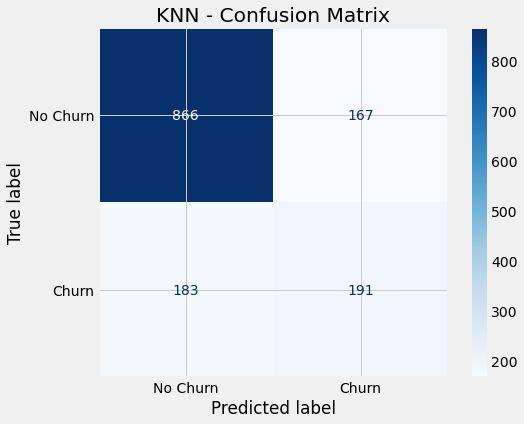

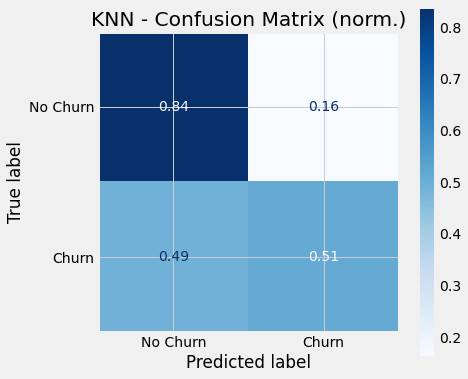

Accuracy Score Test: 0.7512437810945274
Accuracy Score Train: 0.8408888888888889 (as comparision)



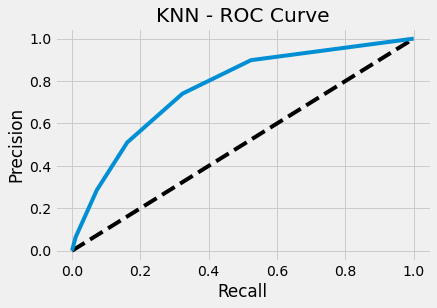

AUC Score (ROC): 0.7641299677487823



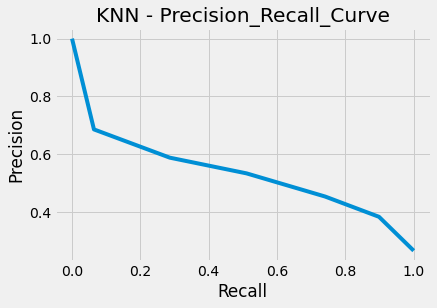

F1 Score: 0.5218579234972678 
AUC Score (PR): 0.5337587548717432



In [33]:
confusion_matrix_plot(x_train, y_train, 
                      x_test, y_test, knn, y_pred_knn, 'KNN')
roc_curve_auc_score(x_test, y_test,
                    y_pred_knn_prob, 'KNN')
precision_recall_curve_and_scores(x_test, y_test,
                                  y_pred_knn, y_pred_knn_prob, 'KNN')

## Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)
logreg.fit(x_train, y_train)


LogisticRegression(max_iter=1000)

In [35]:
y_pred_logreg = logreg.predict(x_test)
y_pred_logreg_prob = logreg.predict_proba(x_test)

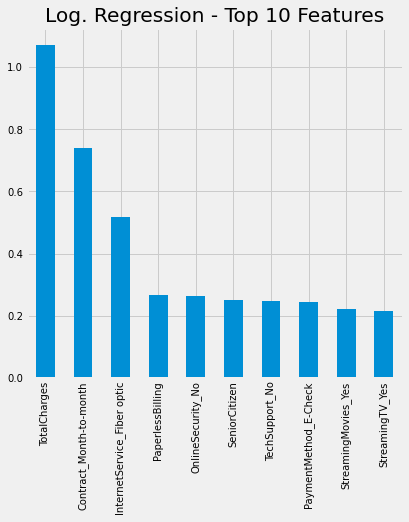

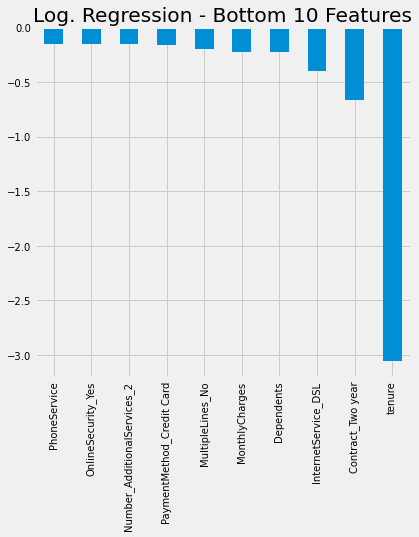

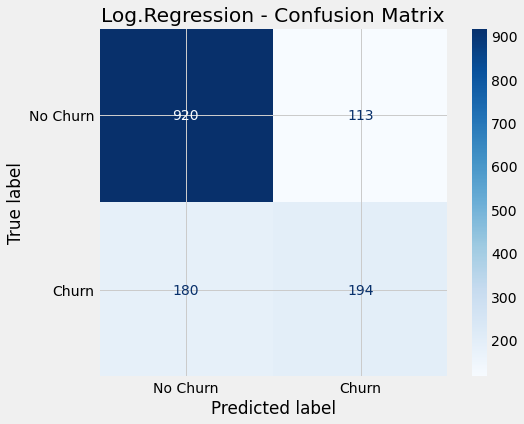

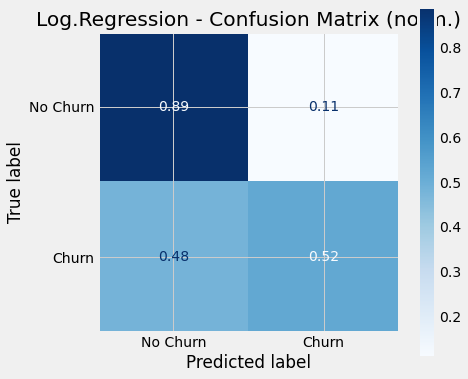

Accuracy Score Test: 0.7917555081734187
Accuracy Score Train: 0.8072888888888888 (as comparision)



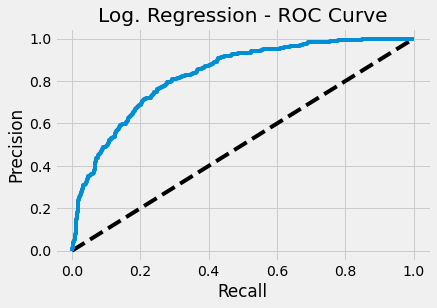

AUC Score (ROC): 0.8318484658670295



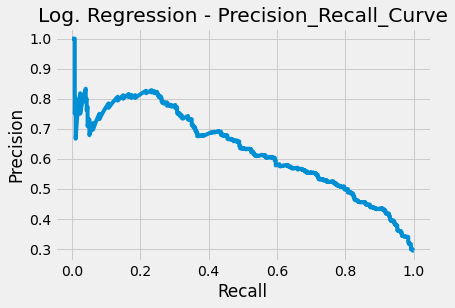

F1 Score: 0.5697503671071952 
AUC Score (PR): 0.6302847259168858



In [36]:
feature_weights(x1, logreg, 'Log. Regression')
confusion_matrix_plot(x_train, y_train, x_test, y_test, 
                      logreg, y_pred_logreg, 'Log.Regression')
roc_curve_auc_score(x_test, y_test, 
                    y_pred_logreg_prob, 'Log. Regression')
precision_recall_curve_and_scores(x_test, y_test, y_pred_logreg, 
                                  y_pred_logreg_prob, 'Log. Regression')

## Random Forest

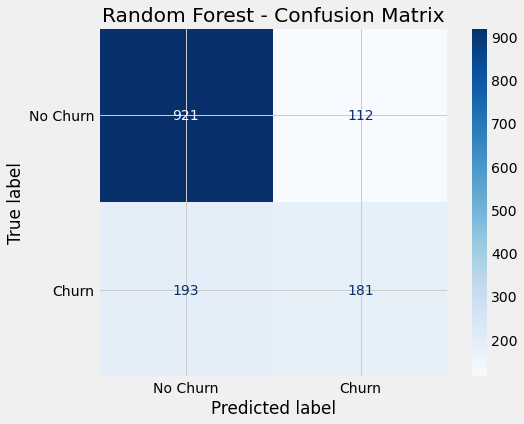

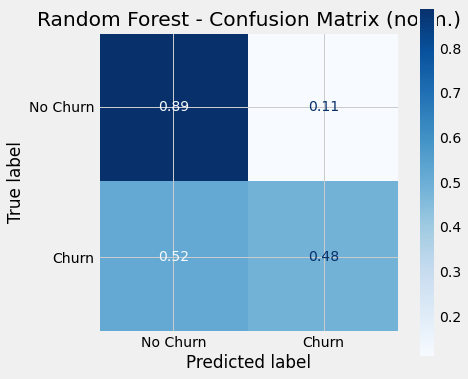

Accuracy Score Test: 0.783226723525231
Accuracy Score Train: 0.9976888888888888 (as comparision)



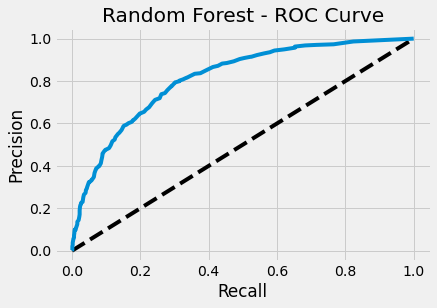

AUC Score (ROC): 0.8127979872755227



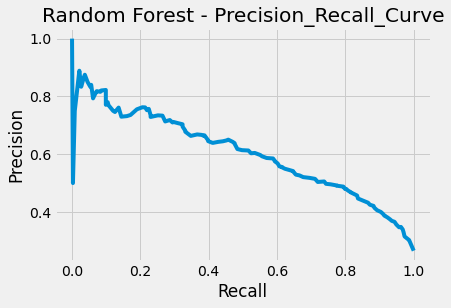

F1 Score: 0.5427286356821589 
AUC Score (PR): 0.6035813627988861



In [37]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)

y_pred_rf = rf.predict(x_test)
y_pred_rf_prob = rf.predict_proba(x_test)

confusion_matrix_plot(x_train, y_train, x_test,
                      y_test, rf, y_pred_rf, 'Random Forest')
roc_curve_auc_score(x_test, y_test, y_pred_rf_prob, 'Random Forest')
precision_recall_curve_and_scores(x_test, y_test,
                                  y_pred_rf, y_pred_rf_prob, 'Random Forest')


## Support Vector Machine

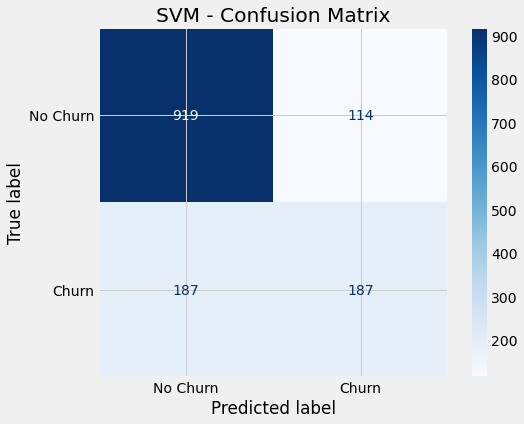

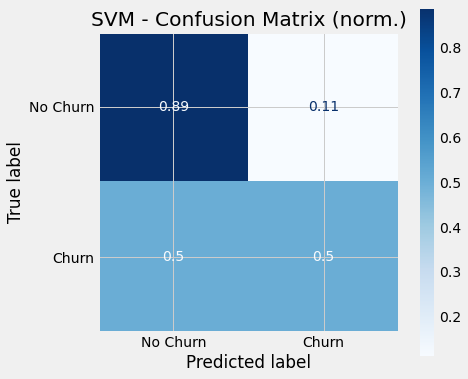

Accuracy Score Test: 0.7860696517412935
Accuracy Score Train: 0.8190222222222222 (as comparision)



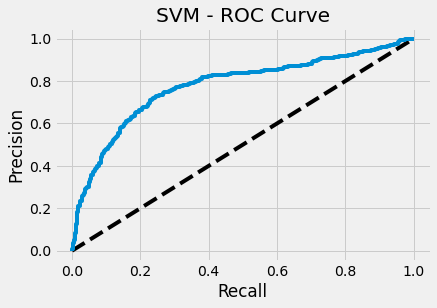

AUC Score (ROC): 0.7763380631668314



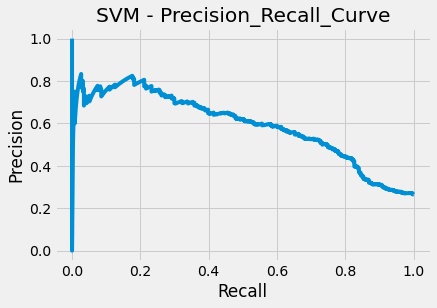

F1 Score: 0.554074074074074 
AUC Score (PR): 0.5888945356287272



In [38]:
from sklearn.svm import SVC

support_vector_m = SVC(kernel='rbf', probability=True)
support_vector_m.fit(x_train,y_train)

y_pred_svm = support_vector_m.predict(x_test)
y_pred_svm_prob = support_vector_m.predict_proba(x_test)

confusion_matrix_plot(x_train, y_train, x_test, 
                      y_test, support_vector_m, y_pred_svm, 'SVM')
roc_curve_auc_score(x_test, y_test, y_pred_svm_prob, 'SVM')
precision_recall_curve_and_scores(x_test, y_test,
                                 y_pred_svm, y_pred_svm_prob, 'SVM')

# Step8: Hyperparameter Tuning / Model Improvement

# K Nearest Neighbors (Optimized)

In [39]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(1,30)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(x_train, y_train)

y_pred_knn_tuned = knn_cv.predict(x_test)
y_pred_knn_tuned_prob = knn_cv.predict_proba(x_test)

print('KNN best number of neighbors:', knn_cv.best_params_, '\n')

KNN best number of neighbors: {'n_neighbors': 22} 



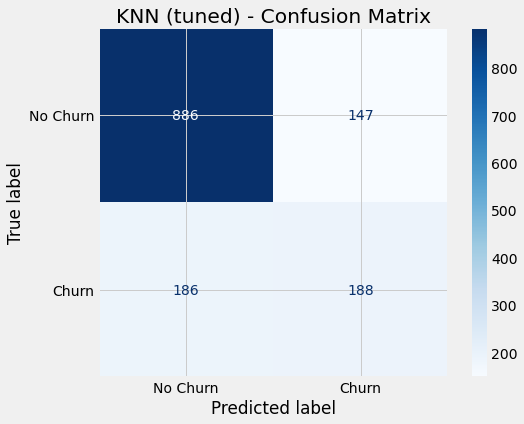

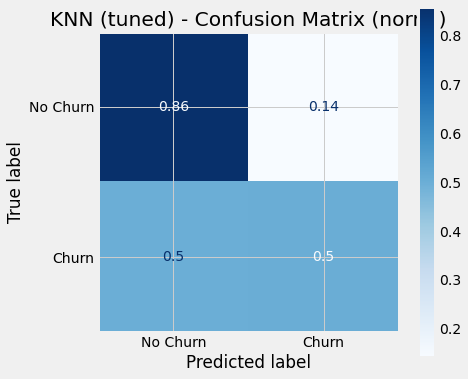

Accuracy Score Test: 0.7633262260127932
Accuracy Score Train: 0.8060444444444445 (as comparision)



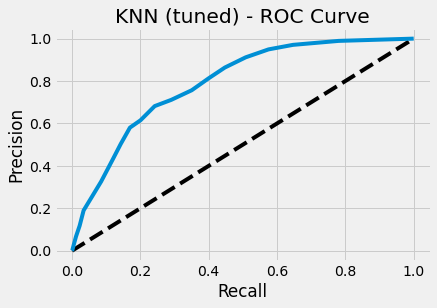

AUC Score (ROC): 0.7910167675272168



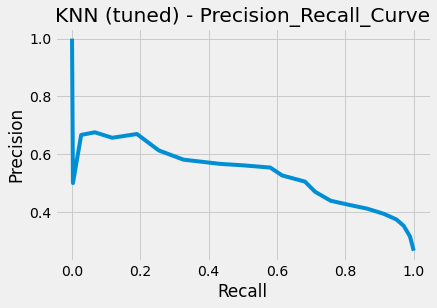

F1 Score: 0.530324400564175 
AUC Score (PR): 0.5372378582613967



In [40]:
confusion_matrix_plot(x_train, y_train, x_test, y_test,
                      knn_cv, y_pred_knn_tuned, 'KNN (tuned)')
roc_curve_auc_score(x_test, y_test, y_pred_knn_tuned_prob, 'KNN (tuned)')
precision_recall_curve_and_scores(x_test, y_test, 
                                  y_pred_knn_tuned, 
                                  y_pred_knn_tuned_prob, 'KNN (tuned)')

## Logistic Regression(Optimized)

In [41]:
param_grid_L1 = {'penalty': ['l1', 'l2'], 'C': np.arange(.1, 5, .1)}
logreg_tuned = LogisticRegression(solver='saga', max_iter=1000)
logreg_tuned_gs = GridSearchCV(logreg_tuned, param_grid_L1, cv=5)
logreg_tuned_gs.fit(x_train, y_train)

y_pred_logreg_tuned = logreg_tuned_gs.predict(x_test)
y_pred_logreg_tuned_prob = logreg_tuned_gs.predict_proba(x_test)

print('Logistic Regression - Best Parameters: ', logreg_tuned_gs.best_params_)

Logistic Regression - Best Parameters:  {'C': 0.9, 'penalty': 'l1'}


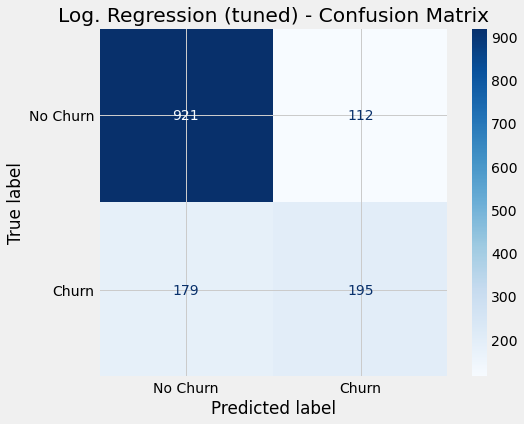

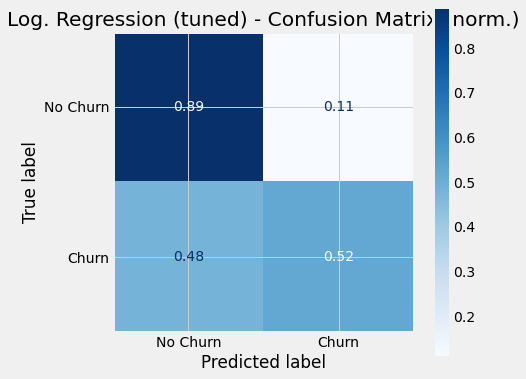

Accuracy Score Test: 0.7931769722814499
Accuracy Score Train: 0.8072888888888888 (as comparision)



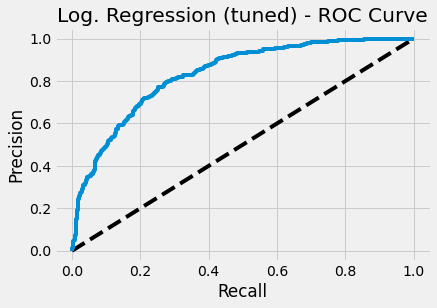

AUC Score (ROC): 0.832353200014495



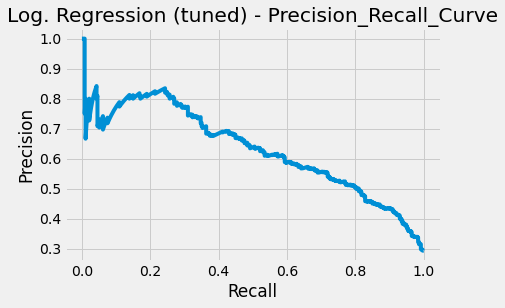

F1 Score: 0.5726872246696034 
AUC Score (PR): 0.6317199512660256



In [42]:
confusion_matrix_plot(x_train, y_train, x_test, y_test, logreg_tuned_gs, 
                     y_pred_logreg_tuned, 'Log. Regression (tuned)')
roc_curve_auc_score(x_test, y_test, y_pred_logreg_tuned_prob,
                   'Log. Regression (tuned)')
precision_recall_curve_and_scores(x_test, y_test, y_pred_logreg_tuned,
                                  y_pred_logreg_tuned_prob,
                                  'Log. Regression (tuned)')


## Random Forest (Optimized)

In [43]:
from sklearn.model_selection import RandomizedSearchCV

param_grid_rf = {'n_estimators': np.arange(10, 2000, 10),
                'max_features': ['auto', 'sqrt'],
                'max_depth': np.arange(10, 200, 10),
                'criterion': ['gini', 'entropy'],
                'bootstrap': [True, False]}

rf = RandomForestClassifier()
rf_random_grid = RandomizedSearchCV(estimator=rf,
                                    param_distributions=param_grid_rf,
                                   cv=5, verbose=0)
rf_random_grid.fit(x_train, y_train)

y_pred_rf_tuned = rf_random_grid.predict(x_test)
y_pred_rf_tuned_prob = rf_random_grid.predict_proba(x_test)

print('Random Forest - Best Parameters: ', rf_random_grid.best_params_)


Random Forest - Best Parameters:  {'n_estimators': 420, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'gini', 'bootstrap': True}


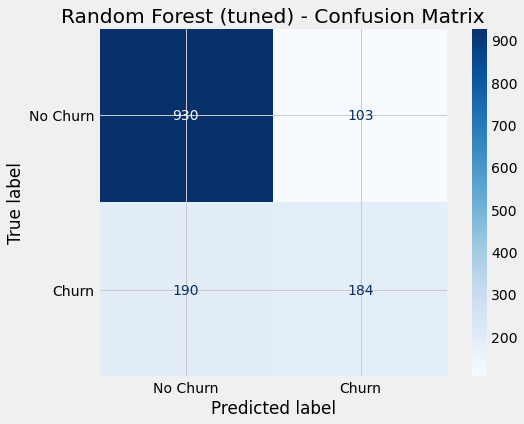

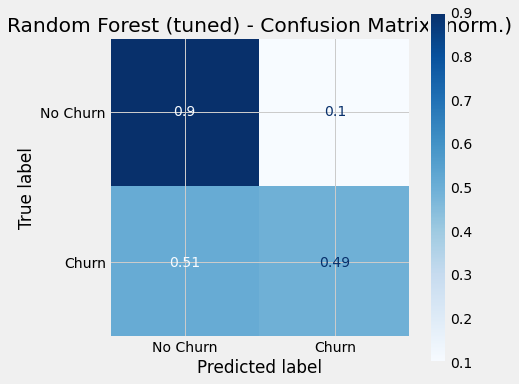

Accuracy Score Test: 0.7917555081734187
Accuracy Score Train: 0.8705777777777778 (as comparision)



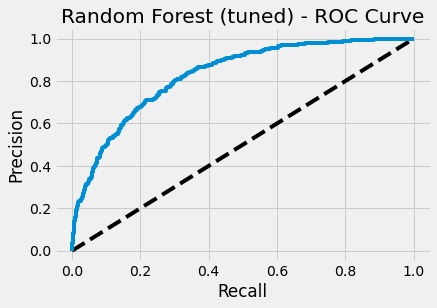

AUC Score (ROC): 0.8286311092244696



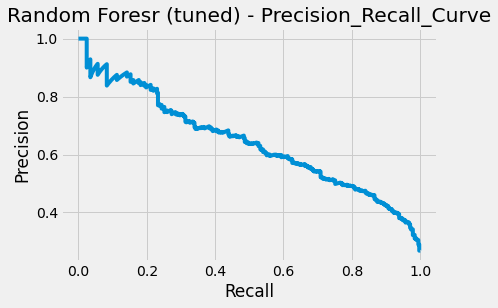

F1 Score: 0.556732223903177 
AUC Score (PR): 0.6434915189754837



In [44]:
confusion_matrix_plot(x_train, y_train, x_test, y_test, rf_random_grid, 
                     y_pred_rf_tuned, 'Random Forest (tuned)')
roc_curve_auc_score(x_test, y_test, 
                    y_pred_rf_tuned_prob, 'Random Forest (tuned)')
precision_recall_curve_and_scores(x_test, y_test, y_pred_rf_tuned, y_pred_rf_tuned_prob,
                                 'Random Foresr (tuned)')

## Support Vector Machine (Optimized)

In [45]:
param_grid_svm = {'C': np.arange(.1, 3, .1)}
support_vector_m = SVC(kernel='linear', probability=True)
support_vector_m_tuned = GridSearchCV(support_vector_m,
                                       param_grid_svm, cv=5)
support_vector_m_tuned.fit(x_train, y_train)

y_pred_svm_tuned = support_vector_m_tuned.predict(x_test)
y_pred_svm_tuned_prob = support_vector_m_tuned.predict_proba(x_test)

print('SVM best C value', support_vector_m_tuned.best_params_, '\n')

SVM best C value {'C': 0.30000000000000004} 



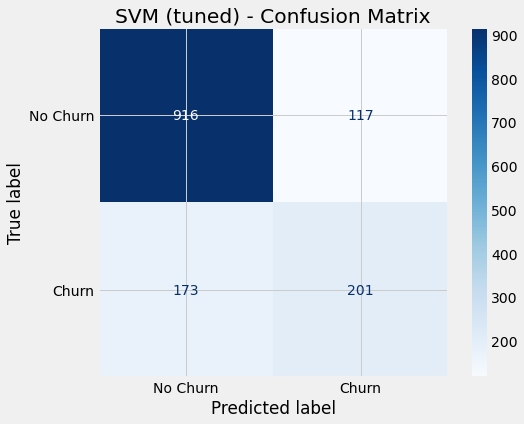

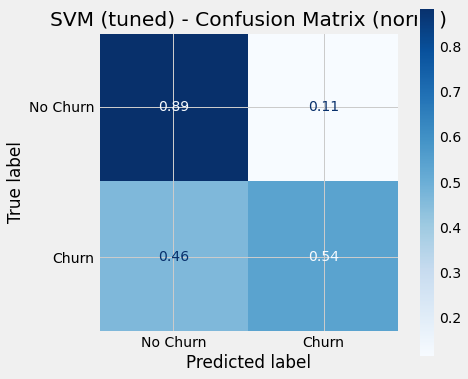

Accuracy Score Test: 0.7938877043354655
Accuracy Score Train: 0.8026666666666666 (as comparision)



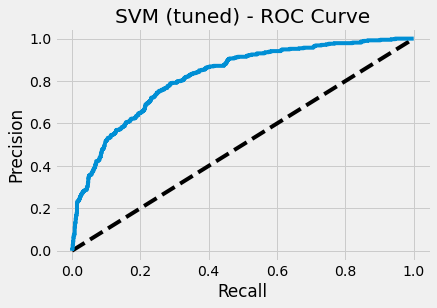

AUC Score (ROC): 0.8200583938582915



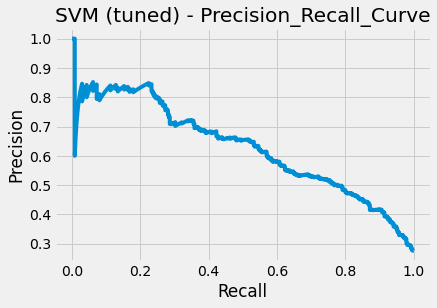

F1 Score: 0.5809248554913296 
AUC Score (PR): 0.6282853249527097



In [46]:
confusion_matrix_plot(x_train, y_train, 
                      x_test, y_test, support_vector_m_tuned,
                      y_pred_svm_tuned, 'SVM (tuned)' )
roc_curve_auc_score(x_test, y_test, y_pred_svm_tuned_prob, 'SVM (tuned)')
precision_recall_curve_and_scores(x_test, y_test,
                                   y_pred_svm_tuned,
                                   y_pred_svm_tuned_prob, 'SVM (tuned)')


## Feed Forward Neural Network

In [47]:
from keras.models import Sequential, load_model
from keras import layers
from keras.layers.core import Dropout
from keras.callbacks import ModelCheckpoint 

In [48]:
nn = Sequential()
Input_Shape = x_train.shape[1]

nn.add(layers.Dense(1024, input_shape=(Input_Shape,), activation='relu'))
nn.add(Dropout(0.2))
nn.add(layers.Dense(1024, activation='relu'))
nn.add(Dropout(0.2))
nn.add(layers.Dense(1, activation='sigmoid'))
nn.compile(loss='binary_crossentropy', optimizer='adam',
           metrics=['accuracy'])
nn.summary()

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy',
                     mode='max', verbose=0, save_best_only=True)

fit_nn = nn.fit(x_train, y_train,
               epochs=100,verbose=False,
               validation_data=(x_test, y_test),
               batch_size=30, callbacks=[mc])
best_nn = load_model('best_model.h5')



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              49152     
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 1,099,777
Trainable params: 1,099,777
Non-trainable params: 0
_________________________________________________________________


In [49]:
accuracy = best_nn.evaluate(x_train, y_train, verbose=False)
print("Best Model Training score: {:.4f}".format(accuracy[0]))
print("Best Model Training Accuracy: {:.4f}".format(accuracy[1]))

accuracy = best_nn.evaluate(x_test, y_test, verbose=False)
print("Best Model Testing score: {:.4f}".format(accuracy[0]))
print("Best Model Testing Accuracy: {:.4f}".format(accuracy[1]))
print("--------------------------------")

accuracy = nn.evaluate(x_train, y_train, verbose=False)
print("Final Model Training score: {:.4f}".format(accuracy[0]))
print("Final Model Training Accuracy: {:.4f}".format(accuracy[1]))

accuracy = nn.evaluate(x_test, y_test, verbose=False)
print("Final Model Testing score: {:.4f}".format(accuracy[0]))
print("Final Model Testing Accuracy: {:.4f}".format(accuracy[1]))


Best Model Training score: 0.3798
Best Model Training Accuracy: 0.8176
Best Model Testing score: 0.4501
Best Model Testing Accuracy: 0.7982
--------------------------------
Final Model Training score: 0.0963
Final Model Training Accuracy: 0.9548
Final Model Testing score: 1.7940
Final Model Testing Accuracy: 0.7370


In [50]:
def plot_history(fit_keras):
    acc = fit_keras.history['accuracy']
    val_acc = fit_keras.history['val_accuracy']
    loss = fit_keras.history['loss']
    val_loss = fit_keras.history['val_loss']
    x = range(1, len(acc) + 1)
    
    plt.figure(figsize=(14, 7))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training Acc.')
    plt.plot(x, val_acc, 'r', label='Testing Acc.')
    plt.title('Training & Testing Accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label="Testing loss")
    plt.title('Training & Testing Accuracy')
    plt.legend()
    

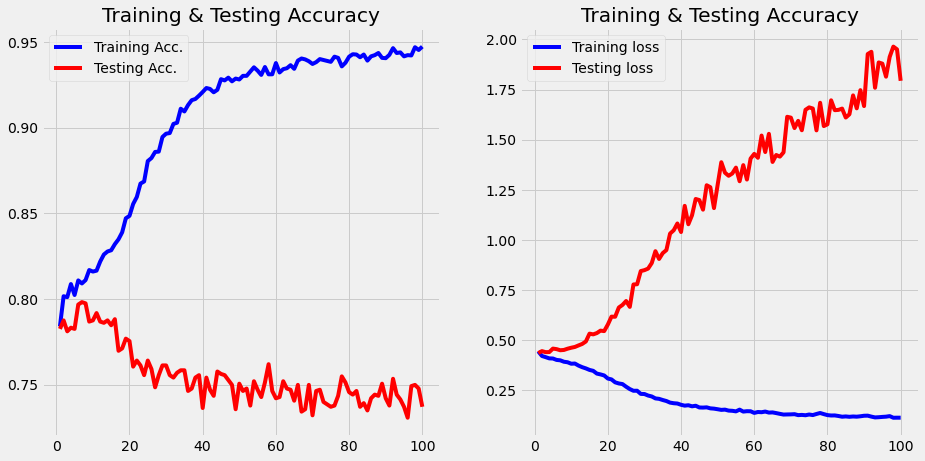

In [51]:
plot_history(fit_nn)

In [52]:
y_pred_nn = best_nn.predict(x_test)
y_pred_nn_prob = best_nn.predict_proba(x_test)
y_pred_nn_classes = best_nn.predict_classes(x_test)

y_pred_nn_prob_1 = y_pred_nn_prob[:,0]
y_pred_nn_classes_1 = y_pred_nn_classes[:,0]

AttributeError: 'Sequential' object has no attribute 'predict_proba'

In [ ]:
nn_conf_matrix = confusion_matrix(y_test, y_pred_nn_classes_1)
print(f'Confusion Matrix:\n{nn_conf_matrix}')
print("----------------------------------------")

nn_accuracy = accuracy_score(y_test, y_pred_nn_classes-1)
print('Accuracy: %f' % nn_accuracy)

nn_auc = roc_auc_score(y_test, y_pred_nn_prob_1)
print('ROC AUC: %f' % nn_auc)
print("----------------------------------------")

nn_precision = precision_score(y_test, y_pred_nn_classes_1)
print('Precision: %f' % nn_precision)

nn_recall = recall_score(y_test, y_pred_nn_classses_1)
print('Recall: %f' % nn_recall)

nn_f1 = f1_score(y_test, y_pred_nn_classes_1)
print('F1 score: %f' % nn_f1)

# Summary

Looking at model results, the best accuracy on the test set is achieved by the neural network with 0,7996. Given the high imbalance of the data towards non-churners, it makes sense to compare F1 scores to get the model with the best score on jointly precision and recall. This would also be the neural network with a F1 score of 0,5948.

Given the scores of the best performing models, it can be observed that F1 scores are not much above 50%. Further optimization efforts should be carried out to achieve a higher scores and thereby increase prediction power for more business value.